In [10]:
# Dependencies
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Gymnasium

In [11]:
gym = pd.read_csv('../Results/Gym_Rating.csv')
del gym['Unnamed: 0']
gym.replace('NAN', value=0, inplace=True)
gym = gym.rename(columns={'gym Total Count':'Total Count', 'Facility gym':'Gymnasium Facility'})
gym['Rating']=gym['Rating'].astype(float)
gym['Total Count']=gym['Total Count'].astype(int)
gym.head()

,City Name,Gymnasium Facility,Latitude,Longitude,Rating,Site Name,Total Count
0,Northern Virginia Area,Gold's Gym,38.96,-77.42,2.7,Center for Innovation Technology,3
1,Northern Virginia Area,UFC Gym Reston/Herndon,38.96,-77.42,5.0,Center for Innovation Technology,3
2,Northern Virginia Area,Worldgate Sport&Health,38.96,-77.42,4.0,Center for Innovation Technology,3
3,Northern Virginia Area,Gold's Gym,38.84,-77.05,3.4,Crystal City and Potomac Yard,8
4,Northern Virginia Area,LA Fitness,38.84,-77.05,3.1,Crystal City and Potomac Yard,8


In [12]:
new_gym = gym.groupby(['City Name', 'Site Name'])
gym_count_df = pd.DataFrame(new_gym['Site Name'].value_counts())
gym_count_df = gym_count_df.rename(columns={'Site Name': 'Total Count'})
gym_count_df = gym_count_df.reset_index(level=1)
gym_count_df = gym_count_df.reset_index(level=0)
gym_count_df = gym_count_df.reset_index(drop=True)
gym_count_df.head()

,City Name,Site Name,Total Count
0,Atlanta,Downtown Atlanta,12
1,Atlanta,Former GM plant,6
2,Atlanta,Midtown,3
3,Atlanta,The High Street Site,4
4,Austin,American-Statesman,9


In [13]:
gym_count_final = gym_count_df.groupby(['City Name'])
gym_count_final_df = pd.DataFrame(gym_count_final['Total Count'].sum())
gym_count_final_df = gym_count_final_df.sort_values(['Total Count'])[::-1]
gym_count_final_df = gym_count_final_df.reset_index()
gym_count_final_df['Type']='Gymnasium'
gym_count_final_df

,City Name,Total Count,Type
0,Chicago,126,Gymnasium
1,New York,80,Gymnasium
2,Boston,59,Gymnasium
3,Washington DC,51,Gymnasium
4,Austin,40,Gymnasium
5,Los Angeles,29,Gymnasium
6,Atlanta,25,Gymnasium
7,Raleigh,12,Gymnasium
8,Northern Virginia Area,11,Gymnasium


==================TEST====================
                City Name  Total Count
0                 Chicago          126
1                New York           80
2                  Boston           59
3           Washington DC           51
4                  Austin           40
5             Los Angeles           29
6                 Atlanta           25
7                 Raleigh           12
8  Northern Virginia Area           11
{'Chicago': 1, 'New York': 2, 'Boston': 3, 'Washington DC': 4, 'Austin': 5, 'Los Angeles': 6, 'Atlanta': 7, 'Raleigh': 8, 'Northern Virginia Area': 9}
==================END====================


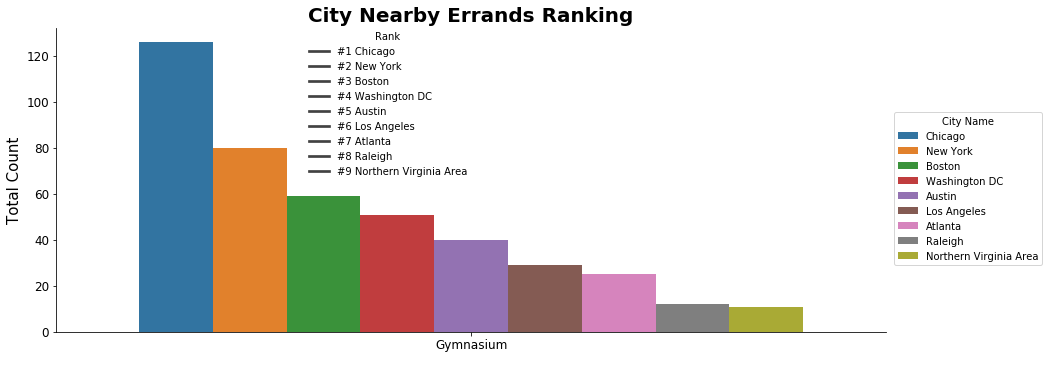

In [14]:
print("========================================")
print("==================TEST====================")

sns.factorplot(kind='bar',x='Type',y='Total Count',data=gym_count_final_df,
               hue='City Name', size=5, aspect=2.5)

total_count = gym_count_final_df.groupby(['City Name'])['Total Count'].sum().sort_values()[::-1].reset_index()
total_count_df = pd.DataFrame(total_count)
print(total_count_df)
ranks_dict = {}
y=1
for name in total_count_df['City Name']:
    ranks_dict[name] = y
    y=y+1
print(ranks_dict)

plt.title('City Nearby Errands Ranking', fontsize=20, fontweight='bold')

plt.xlabel(' ', fontsize=15)
plt.ylabel('Total Count', fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

new_labels = ['#1 Chicago', '#2 New York ', '#3 Boston', '#4 Washington DC', '#5 Austin', '#6 Los Angeles',
              '#7 Atlanta', '#8 Raleigh', '#9 Northern Virginia Area']
plt.legend(new_labels, frameon=False, title='Rank',
           bbox_to_anchor=(.5, 1), loc=1, borderaxespad=0.)


print("========================================")
print("==================END====================")

plt.savefig('Save_Figs/Fitness.png', bbox_inches='tight')

plt.show()